In [15]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [36]:
import os

In [37]:
path = r"C:\Users\Sparsh Mahajan\Downloads\archive (14)"

In [38]:
import glob 
count = glob.glob(path+"/animals/animals/*/*JPG")
len(count)

5400

In [39]:
count[0]

'C:\\Users\\Sparsh Mahajan\\Downloads\\archive (14)/animals/animals\\antelope\\02f4b3be2d.jpg'

In [40]:
listanimals =os.listdir(path+"/animals/animals")

In [41]:
listanimals

['antelope',
 'badger',
 'bat',
 'bear',
 'bee',
 'beetle',
 'bison',
 'boar',
 'butterfly',
 'cat',
 'caterpillar',
 'chimpanzee',
 'cockroach',
 'cow',
 'coyote',
 'crab',
 'crow',
 'deer',
 'dog',
 'dolphin',
 'donkey',
 'dragonfly',
 'duck',
 'eagle',
 'elephant',
 'flamingo',
 'fly',
 'fox',
 'goat',
 'goldfish',
 'goose',
 'gorilla',
 'grasshopper',
 'hamster',
 'hare',
 'hedgehog',
 'hippopotamus',
 'hornbill',
 'horse',
 'hummingbird',
 'hyena',
 'jellyfish',
 'kangaroo',
 'koala',
 'ladybugs',
 'leopard',
 'lion',
 'lizard',
 'lobster',
 'mosquito',
 'moth',
 'mouse',
 'octopus',
 'okapi',
 'orangutan',
 'otter',
 'owl',
 'ox',
 'oyster',
 'panda',
 'parrot',
 'pelecaniformes',
 'penguin',
 'pig',
 'pigeon',
 'porcupine',
 'possum',
 'raccoon',
 'rat',
 'reindeer',
 'rhinoceros',
 'sandpiper',
 'seahorse',
 'seal',
 'shark',
 'sheep',
 'snake',
 'sparrow',
 'squid',
 'squirrel',
 'starfish',
 'swan',
 'tiger',
 'turkey',
 'turtle',
 'whale',
 'wolf',
 'wombat',
 'woodpecker',


In [8]:
len(listanimals)

90

In [9]:
imagename = pd.Series(count)

In [10]:
imagename[0]

'C:\\Users\\Sparsh Mahajan\\Downloads\\archive (14)/animals/animals\\antelope\\02f4b3be2d.jpg'

In [11]:
imagename.isnull().sum()

0

In [12]:
df = pd.DataFrame()
df['Filename'] = imagename.map(lambda imgname: imgname.split("\\")[-1])
df['Class'] = imagename.map(lambda imgname: imgname.split('\\')[-2])
df.head()

Filename     Class
0  02f4b3be2d.jpg  antelope
1  03d7fc0888.jpg  antelope
2  058fa9a60f.jpg  antelope
3  0a37838e99.jpg  antelope
4  0b1a3af197.jpg  antelope

In [13]:
import matplotlib.pyplot as plt


In [14]:
df.isnull().sum()

Filename    0
Class       0
dtype: int64

In [15]:
distribution = df['Class'].value_counts()

In [16]:
distribution

antelope     60
raccoon      60
porcupine    60
pigeon       60
pig          60
             ..
goat         60
fox          60
fly          60
flamingo     60
zebra        60
Name: Class, Length: 90, dtype: int64

<BarContainer object of 90 artists>

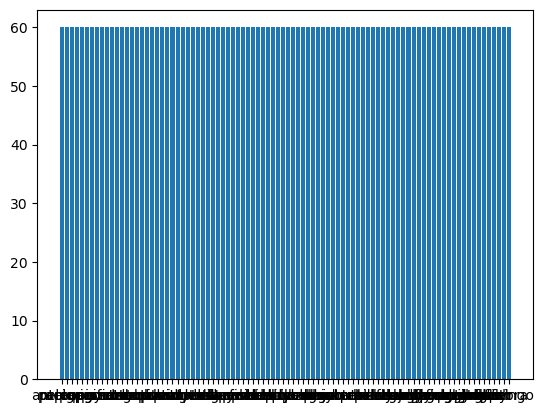

In [17]:
plt.bar(distribution.index , distribution.values)

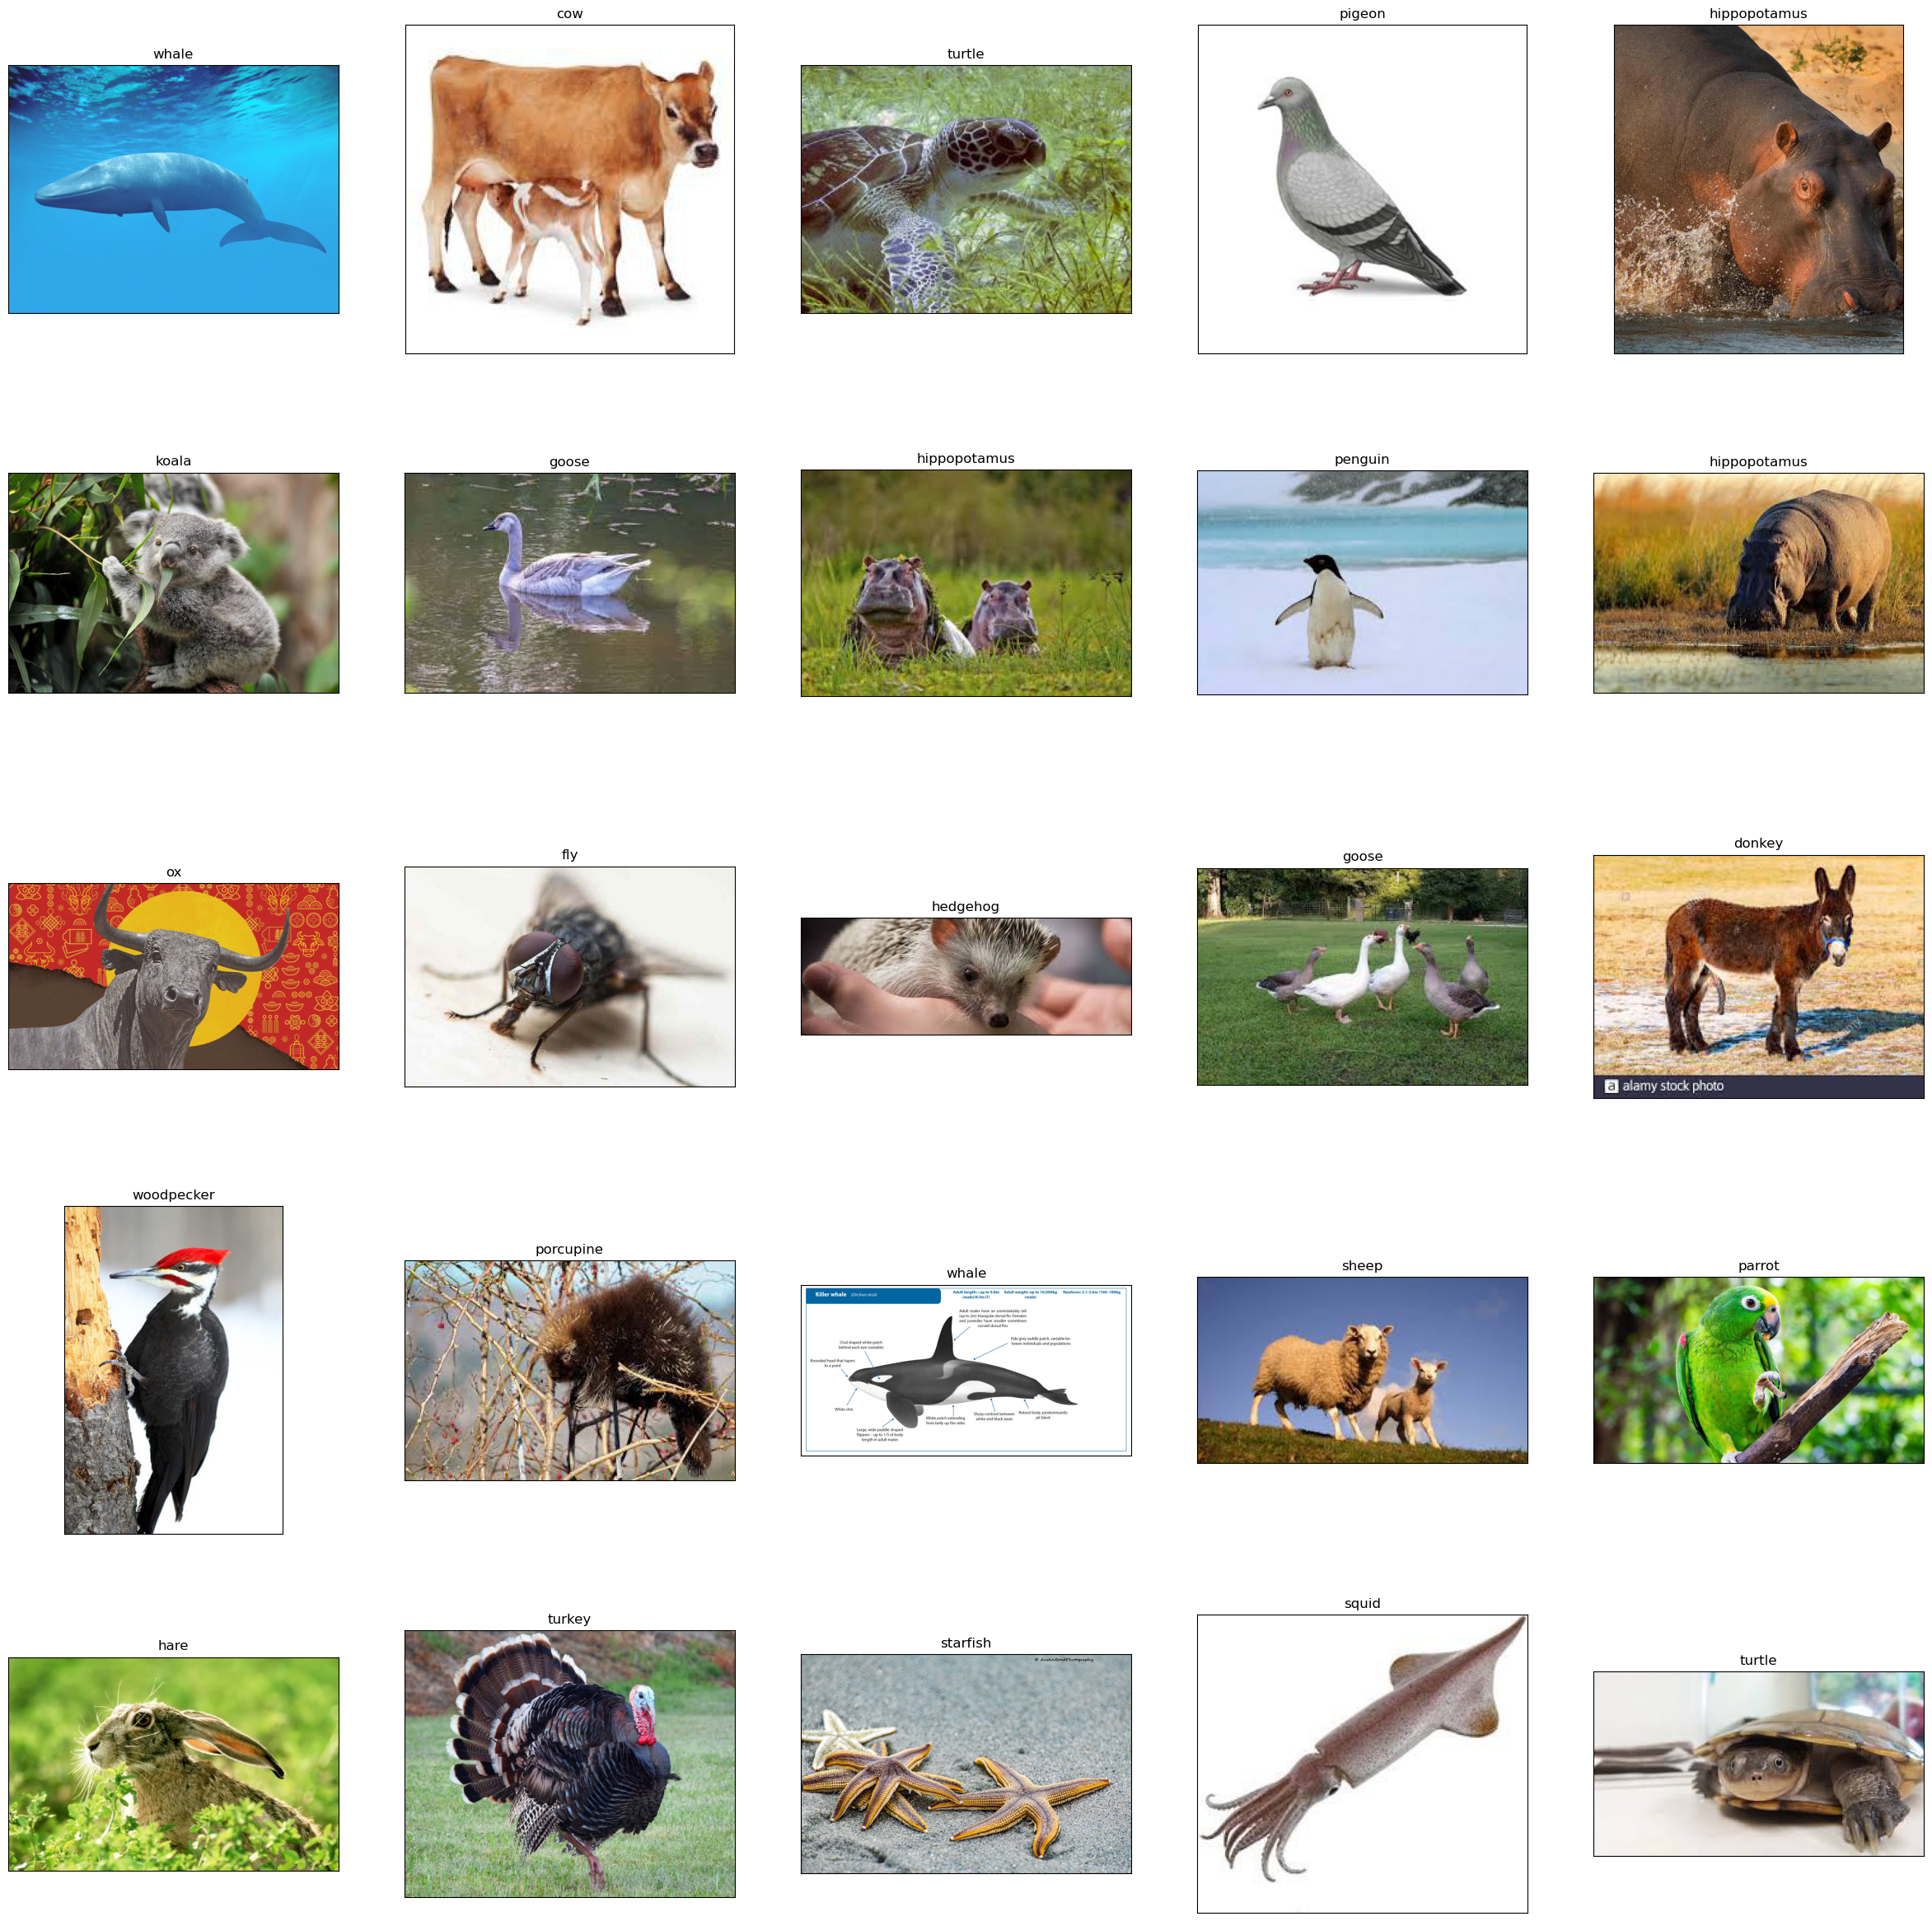

In [18]:
plot_df = df.sample(25).reset_index()
plt.figure(figsize=(30, 30))


for i in range(25):
    img_name = plot_df.loc[i, 'Filename']
    label_str = (plot_df.loc[i, 'Class'])
    plt.subplot(5,5,i+1)
    plt.imshow(plt.imread(os.path.join(r"C:/Users/Sparsh Mahajan/Downloads/archive (14)/animals/animals",label_str, img_name)))
    plt.title(label_str)
    plt.xticks([])
    plt.yticks([])

In [47]:
import tensorflow as tf

In [50]:
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16 
from tensorflow.keras.layers import Input , Dense  , Dropout , Flatten

In [95]:
num_classes = 90

i=Input(shape=(200 , 200 , 3))
x=tf.keras.applications.vgg16.preprocess_input(i)
x=tf.keras.applications.VGG16(
    include_top=False,
    weights='imagenet',
    pooling='avg',
    classes=90,
    classifier_activation='softmax'
)(x)

model= tf.keras.Model(inputs=i , outputs=x)
for layer in model.layers:
    layer.trainable=False
    


In [122]:


x=Flatten()(model.output)
x=Dropout(0.3)(x)
x=Dense(90 , activation='softmax')(x)

model2=tf.keras.Model(inputs=model.input , outputs=x)

In [123]:
model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer ='adam',
              metrics=['accuracy'])

In [23]:
from sklearn.model_selection import train_test_split

In [5]:
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [25]:
model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 vgg19 (Functional)          (None, 512)               20024384  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 90)                46170     
                                                                 
Total params: 20070554 (76.56 MB)
Trainable params: 46170 (180.35 KB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


In [8]:

image_size = 200
data_dir = r"C:/Users/Sparsh Mahajan/Downloads/archive (14)/animals/animals/"
data_generator = ImageDataGenerator(preprocess_input, 
    validation_split=0.27,
    shear_range=0.2,
    rotation_range=359,
    zoom_range=0.5,
    horizontal_flip =True,
    vertical_flip = True
                            )

train_generator = data_generator.flow_from_directory(
    directory=data_dir,
    target_size=[image_size, image_size],
    #batch_size=128,
    class_mode='sparse',
    subset='training',
    shuffle=True ,
    seed=42  
)

valid_generator = data_generator.flow_from_directory(
    directory=data_dir,
    #batch_size=128 ,
    target_size=[image_size, image_size],
    class_mode='sparse',
    subset='validation',
    shuffle=True ,
    seed=42
)


Found 3960 images belonging to 90 classes.
Found 1440 images belonging to 90 classes.


In [ ]:

fit_stats =model2.fit(train_generator ,
                       validation_data = valid_generator,
                      batch_size = 128 ,
                      
                       epochs=10) 

Epoch 1/10
124/124 [==============================] - 406s 3s/step - loss: 3.2038 - accuracy: 0.6427 - val_loss: 2.4125 - val_accuracy: 0.7160
Epoch 2/10
124/124 [==============================] - 387s 3s/step - loss: 2.0924 - accuracy: 0.7487 - val_loss: 2.7154 - val_accuracy: 0.7194
Epoch 3/10
124/124 [==============================] - 383s 3s/step - loss: 1.8367 - accuracy: 0.7864 - val_loss: 3.2551 - val_accuracy: 0.7014
Epoch 4/10
124/124 [==============================] - 467s 4s/step - loss: 1.6551 - accuracy: 0.8048 - val_loss: 2.7190 - val_accuracy: 0.7632
Epoch 5/10
124/124 [==============================] - 395s 3s/step - loss: 1.5451 - accuracy: 0.8230 - val_loss: 2.9270 - val_accuracy: 0.7556
Epoch 6/10
124/124 [==============================] - 437s 4s/step - loss: 1.4422 - accuracy: 0.8369 - val_loss: 3.3495 - val_accuracy: 0.7479
Epoch 7/10
 45/124 [=========>....................] - ETA: 3:47 - loss: 1.1437 - accuracy: 0.8542

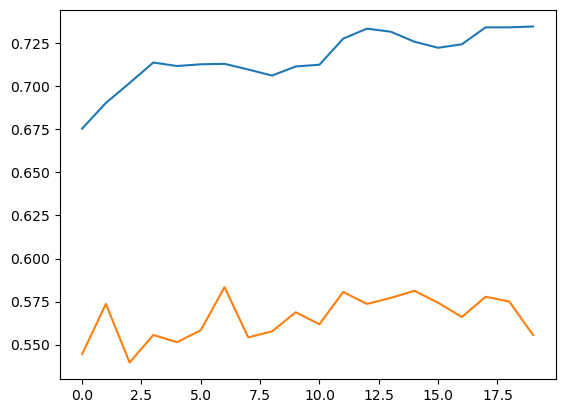

In [42]:
plt.plot(fit_stats.history['accuracy'])
plt.plot(fit_stats.history['val_accuracy'])

In [ ]:
model2.predict()

In [57]:
model2.save('AC.h5')

C:\Users\Sparsh Mahajan\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [2]:
from keras.models import load_model
from keras.preprocessing.image import img_to_array , load_img

In [58]:
model2 = load_model("./AC.h5")

In [9]:
lab = train_generator.class_indices
lab={k:v for v , k in lab.items()}

In [35]:
def output(location):
    img = load_img(location , target_size=(200, 200 , 3))
    img = img_to_array(img)
    #img= img/255
    img= np.expand_dims(img , [0])
    print(img.shape)
    answer=model2.predict(img)
    y_class = answer.argmax(axis=-1);
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = lab[y]
    x={"name" : res}
    json.dumps(x)
    return res

In [29]:
img = r"C:\Users\Sparsh Mahajan\Downloads\archive (14)\animals\animals\octopus\7e351cfc35.jpg"
img1=r"C:\Users\Sparsh Mahajan\Downloads\Blackbuck_male_female.jpg"
img2=r"C:\Users\Sparsh Mahajan\Downloads\archive (14)\animals\animals\bat\8ed76190d8.jpg"
img_lion = r"C:\Users\Sparsh Mahajan\Downloads\gettyimages-1333977253-612x612.jpg"

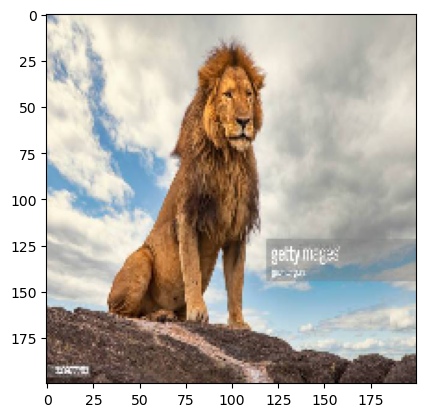

In [31]:
import matplotlib.pyplot as plt
pic = load_img(img_lion, target_size=(200 , 200 , 3))
plt.imshow(pic)



In [26]:
model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 90)                184410    
                                                                 
Total params: 23772122 (90.68 MB)
Trainable params: 184410 (720.35 KB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [33]:
output(img)

(1, 200, 200, 3)
1/1 [==============================] - 0s 109ms/step


'octopus'

In [126]:
model.trainable = True


fine_tune_at = 100


for layer in model.layers[:fine_tune_at]:
    layer.trainable = False

model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.005),
              metrics=['accuracy'])

model2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, 150, 150, 3)]     0         
                                                                 
 tf.__operators__.getitem_8  (None, 150, 150, 3)       0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_8 (TFOpLamb  (None, 150, 150, 3)       0         
 da)                                                             
                                                                 
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten_7 (Flatten)         (None, 512)               0         
                                                                 
 dropout_3 (Dropout)         (None, 512)               0   

In [44]:

from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model2.predict_generator(valid_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(valid_generator.classes, y_pred))
print('Classification Report')
target_names = listanimals
print(classification_report(valid_generator.classes, y_pred, target_names=target_names))

C:\Users\Sparsh Mahajan\AppData\Local\Temp\ipykernel_44044\286799713.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model2.predict_generator(valid_generator)
C:\Users\Sparsh Mahajan\anaconda3\Lib\site-packages\keras\src\preprocessing\image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Confusion Matrix
[[1 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification Report
                precision    recall  f1-score   support

      antelope       0.10      0.06      0.08        16
        badger       0.00      0.00      0.00        16
           bat       0.00      0.00      0.00        16
          bear       0.00      0.00      0.00        16
           bee       0.00      0.00      0.00        16
        beetle       0.00      0.00      0.00        16
         bison       0.00      0.00      0.00        16
          boar       0.00      0.00      0.00        16
     butterfly       0.00      0.00      0.00        16
           cat       0.00      0.00      0.00        16
   caterpillar       0.00      0.00      0.00        16
    chimpanzee       0.00      0.00      0.00        16
     cockroach       0.00      0.00      0.00        16
           cow       0.10      0.06      0.08        16


In [45]:
img = r"C:\Users\Sparsh Mahajan\Downloads\download (1).jpg"
output(img)

(1, 200, 200, 3)
1/1 [==============================] - 0s 125ms/step


'bear'

In [60]:
import pickle
pickle.dump(model2, open('AC2.pkl', 'wb'))